# Read PPL

In [14]:
def cal_mse_from_json(result):
    sum_mse = 0
    total_n = 0
    for k,v in result.items():
        if not k.endswith('.pt'): continue
        sum_mse += v['mse'] * v['num_pixels']
        total_n += v['num_pixels']
        # print(k, v['mse'])
    return sum_mse / total_n

def cal_proxy_loss_from_json(result):
    sum = 0
    total_n = 0
    for k,v in result.items():
        if not k.endswith('.pt'): continue
        sum += v['proxy_err']
        total_n += 1
    return sum / total_n

def cal_mse_col_from_json(result):
    mse_col_max = 0
    mse_col_min = 0
    mse_col_range = 0
    total_n = 0
    for k,v in result.items():
        if not k.endswith('.pt'): continue
        mse_col_max += v['mse_col_max']
        mse_col_min += v['mse_col_min']
        mse_col_range += v['mse_col_range']
        total_n += 1
    return mse_col_max / total_n, mse_col_min/total_n, mse_col_range/total_n

In [29]:
# PPL
import glob
import json
import re
import os
import math
path_list = [
    '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_ldlq128_rnorm_ft',
    '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/scaleH_std_ldlq128_scale_cond(col)_ft/size128_encdim1024_M256'
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/ql_ldlq128_rnorm_ft',
    # '/workspace/Weight_compression/hf_model_comp_results/meta-llama--Llama-2-7b-hf/scaleH_std_ldlq128_scale_cond(col)_uniform31.6_ft_meta/size128_encdim1024_M256'
]
labels = [os.path.join(*p.split('/')[-1:]) for p in path_list]

model = 'Llama3-8B'
# ppl_plots = {}
ppl_plots[model] = {}
# ppl_plots['Llama2-7B'] = {}

for path, l in zip(path_list, labels):
    print('/'.join(path.split('/')[-2:]))
    listdir = glob.glob(f'{path}/*mse_col.json')
    # listdir = [l for l in listdir if 'mse_col' in l]
    print(listdir[:1])

    bpp = []
    mse_col_max_list, mse_col_min_list, mse_col_range_list = [],[],[]
    mse, proxy_err = [], []
    for file in listdir:        
        with open(file, 'r') as f:
            results = json.load(f)            
            try:
                bpp.append(results['bpp_loss'])
                # bpp.append(results['bpp'])
            except:
                bit = re.search(r'w(\d+)', file.lower()).group(1) 
                # bit = re.search(r'qtip-(\d+)', file.lower()).group(1)
                # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
                # bit = re.search(r'8b_(\d+)', file.lower()).group(1)
                # bit = re.search(r'(\d+)\s*bit', file.lower()).group(1)
                bits.append(int(bit))
            
            
            mse.append(cal_mse_from_json(results))
            proxy_err.append(cal_proxy_loss_from_json(results))
            
            mse_col_max, mse_col_min, mse_col_range = cal_mse_col_from_json(results)
            mse_col_max = math.log(mse_col_max)
            mse_col_min = math.log(mse_col_min)
            mse_col_range = math.log(mse_col_range)
            
            
            mse_col_max_list.append(mse_col_max)
            mse_col_min_list.append(mse_col_min)
            mse_col_range_list.append(mse_col_range)
            
    if bpp != []:
        sorted_indices = sorted(range(len(bpp)), key=lambda i: bpp[i])
        bpp = [bpp[i] for i in sorted_indices]
    # elif bits != []:
    #     sorted_indices = sorted(range(len(bits)), key=lambda i: bits[i])
    #     bits = [bits[i] for i in sorted_indices]

    if mse != []:
        mse = [mse[i] for i in sorted_indices]
    if proxy_err != []:
        proxy_err = [proxy_err[i] for i in sorted_indices]
 
    mse_col_max_list = [mse_col_max_list[i] for i in sorted_indices]
    mse_col_min_list = [mse_col_min_list[i] for i in sorted_indices]
    mse_col_range_list = [mse_col_range_list[i] for i in sorted_indices]
    
    # if ptbppl != []:
    #     ptbppl = [ptbppl[i] for i in sorted_indices]
    print("    'bpp' : ", bpp, ',')
    print("    'mse' : ", mse, ',')
    print("    'proxy_err' : ", proxy_err, ',')
    print("    'mse_col_max_list' : ", mse_col_max_list, ',')
    print("    'mse_col_min_list' : ", mse_col_min_list, ',')
    print("    'mse_col_range_list' : ", mse_col_range_list, ',')

    ppl_plots[model][l] = {
        'bpp':bpp,
        'mse': mse,
        'proxy_err': proxy_err,
        'mse_col_max':mse_col_max_list,
        'mse_col_min':mse_col_min_list,
        'mse_col_range':mse_col_range_list,
        }


meta-llama--Meta-Llama-3-8B/ql_ldlq128_rnorm_ft
['/workspace/Weight_compression/hf_model_comp_results/meta-llama--Meta-Llama-3-8B/ql_ldlq128_rnorm_ft/lmbda100_mse_col.json']
    'bpp' :  [2.3050461786781224, 2.6693616848877775, 3.16721133423002, 3.954826640797994, 4.778575841229982, 5.9813804637927275] ,
    'mse' :  [1.1922020008342953e-05, 7.182456868029328e-06, 3.6075478083793437e-06, 1.21747847446298e-06, 3.928943315561612e-07, 9.539555501092423e-08] ,
    'proxy_err' :  [0.023776717499588682, 0.014212751141388123, 0.007104932648612053, 0.0023910072983913517, 0.0007720174055805273, 0.0001886839980918304] ,
    'mse_col_max_list' :  [-5.204359991337315, -5.695782450589732, -6.332361114593214, -7.228845484462706, -7.854735461081202, -8.372724352295785] ,
    'mse_col_min_list' :  [-9.693973027493133, -10.148219211465486, -10.66094633644484, -11.426557604927437, -11.79155653397374, -12.366458348638998] ,
    'mse_col_range_list' :  [-5.215648453588682, -5.7075009889779365, -6.34563501

# Plot

In [30]:
ppl_plots['Llama2-7B']

{'ql_ldlq128_rnorm_ft': {'bpp': [2.3139647332169693,
   2.6760684649599957,
   3.1729504987597466,
   3.9578962498030825,
   4.783335864543915,
   5.985771001195969],
  'mse': [2.7595417852772825e-05,
   1.663243014884431e-05,
   8.35849643849931e-06,
   2.822900951519686e-06,
   9.159766959428988e-07,
   2.2325355233353453e-07],
  'proxy_err': [0.025855992614034613,
   0.015447146319551004,
   0.00770575269245098,
   0.002588066580236565,
   0.0008323470976482181,
   0.00020042360377812787],
  'mse_col_max': [-5.173363007510297,
   -5.666987879352508,
   -6.290444171347135,
   -7.164094685927436,
   -7.779991252275732,
   -8.382675345972991],
  'mse_col_min': [-9.297633449743913,
   -9.741647840284948,
   -10.256926097806742,
   -11.031355412843528,
   -11.373824744903892,
   -11.975546093872188],
  'mse_col_range': [-5.189670546664692,
   -5.684131997168494,
   -6.309565777749301,
   -7.185232099868821,
   -7.8078689853109715,
   -8.410580309233083]},
 'size128_encdim1024_M256': {'bp

/tmp/ipykernel_3574510/4132587855.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


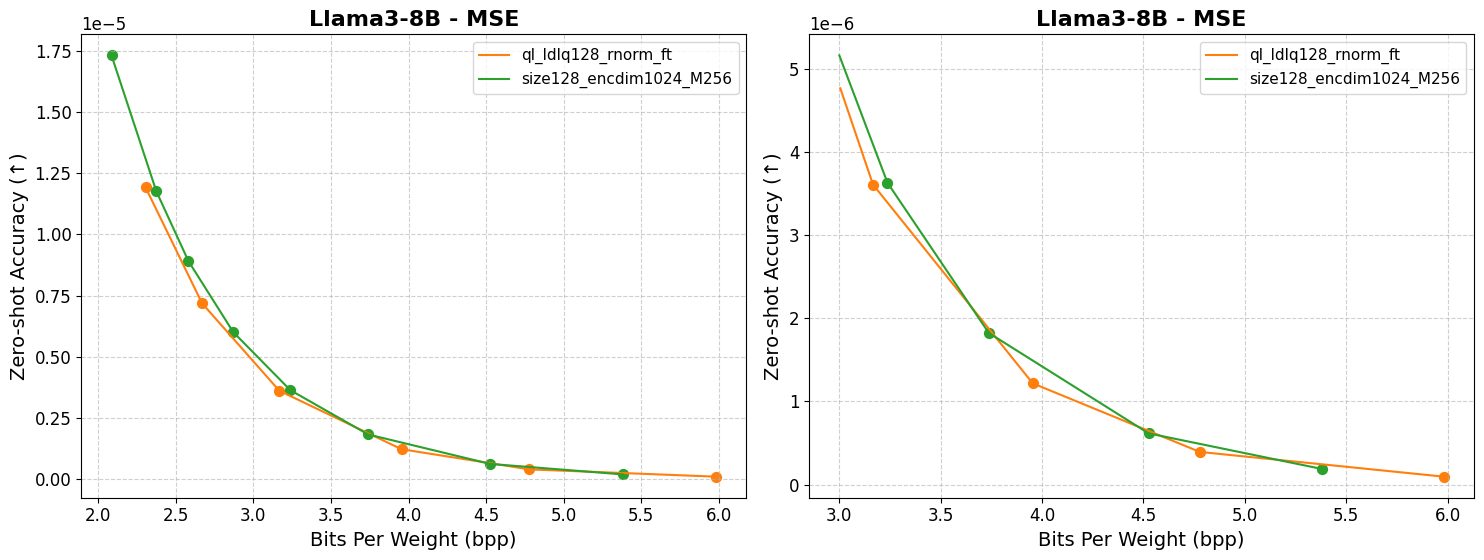

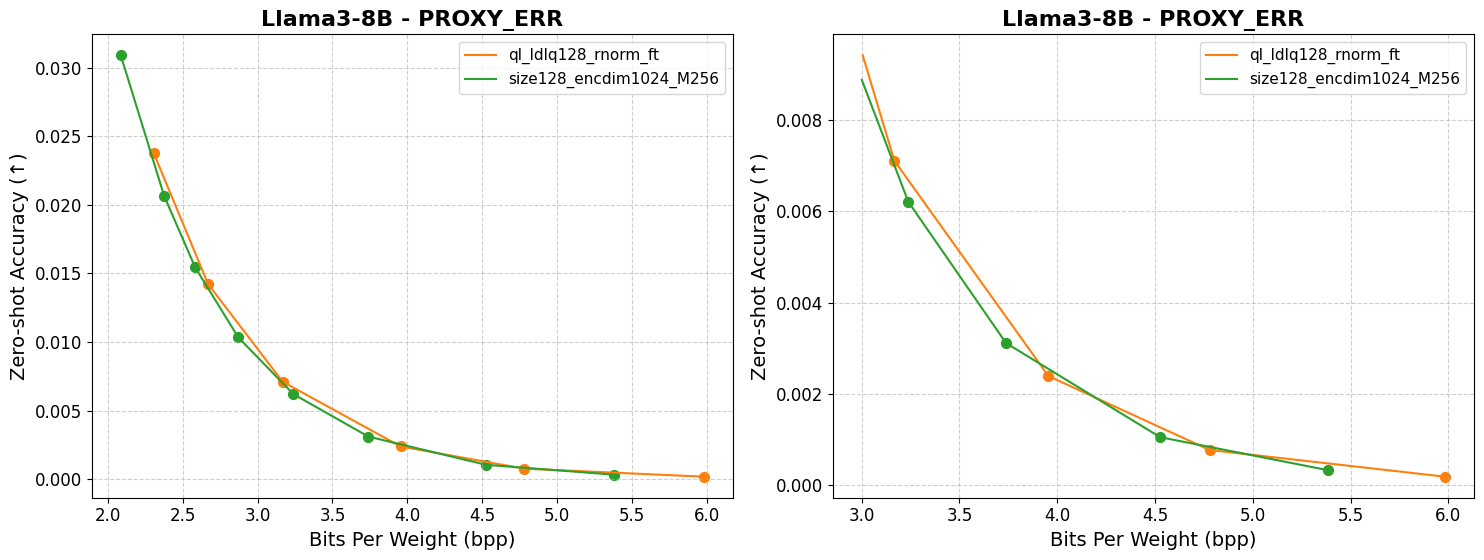

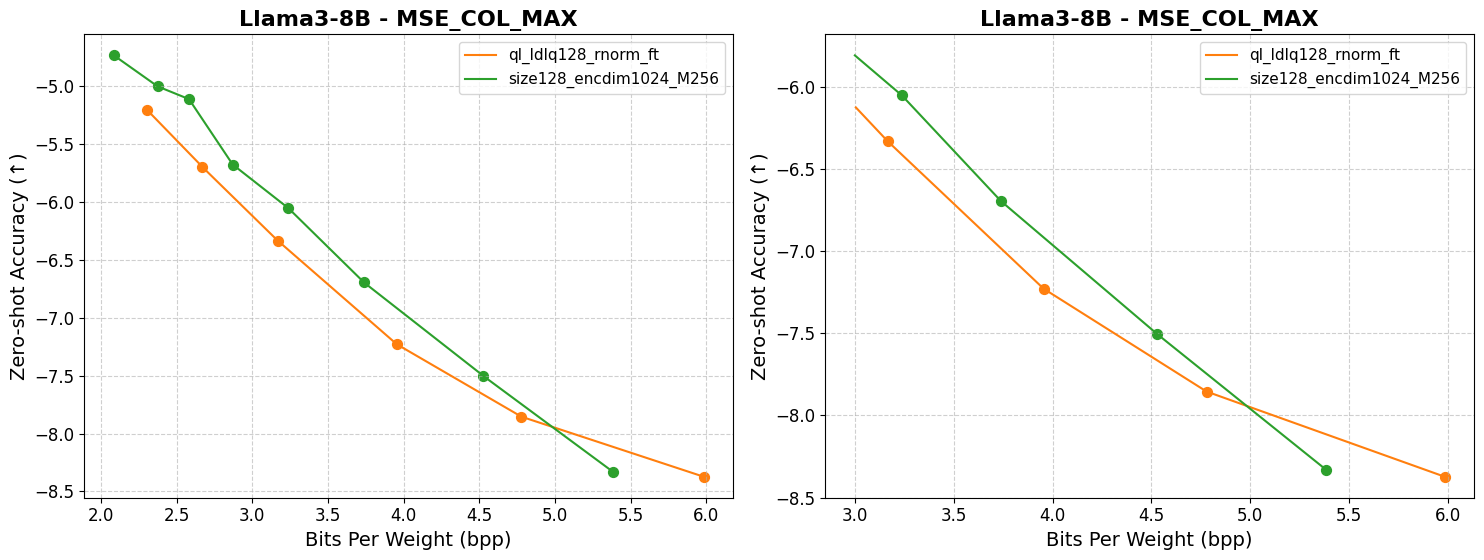

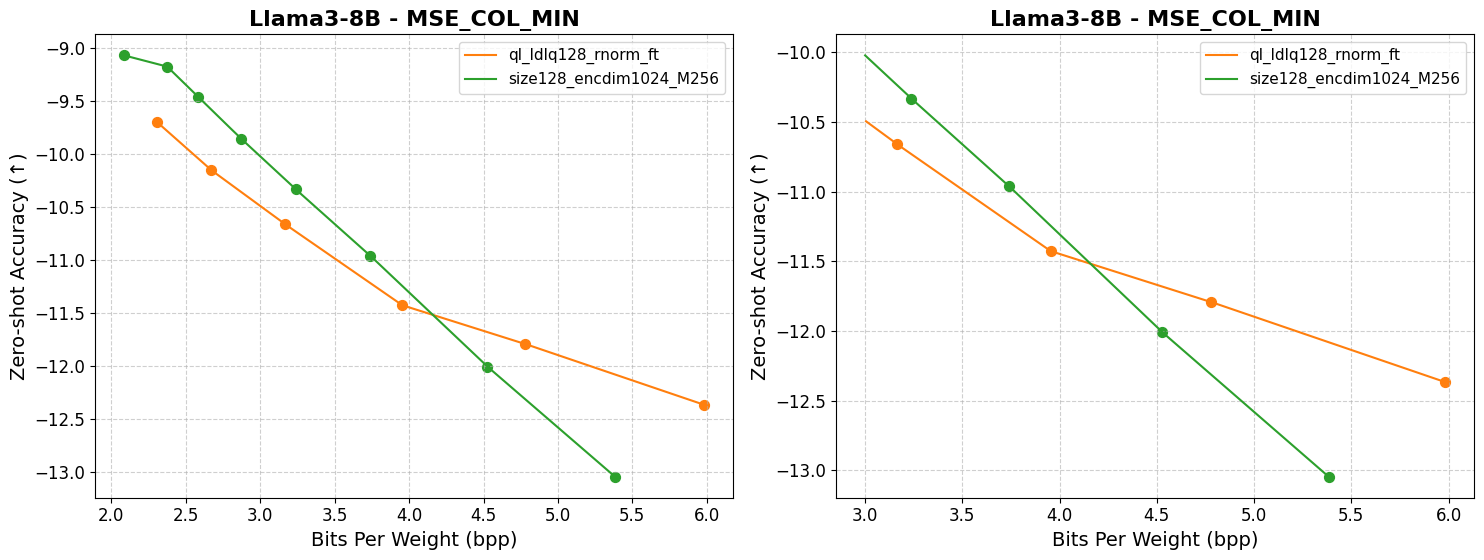

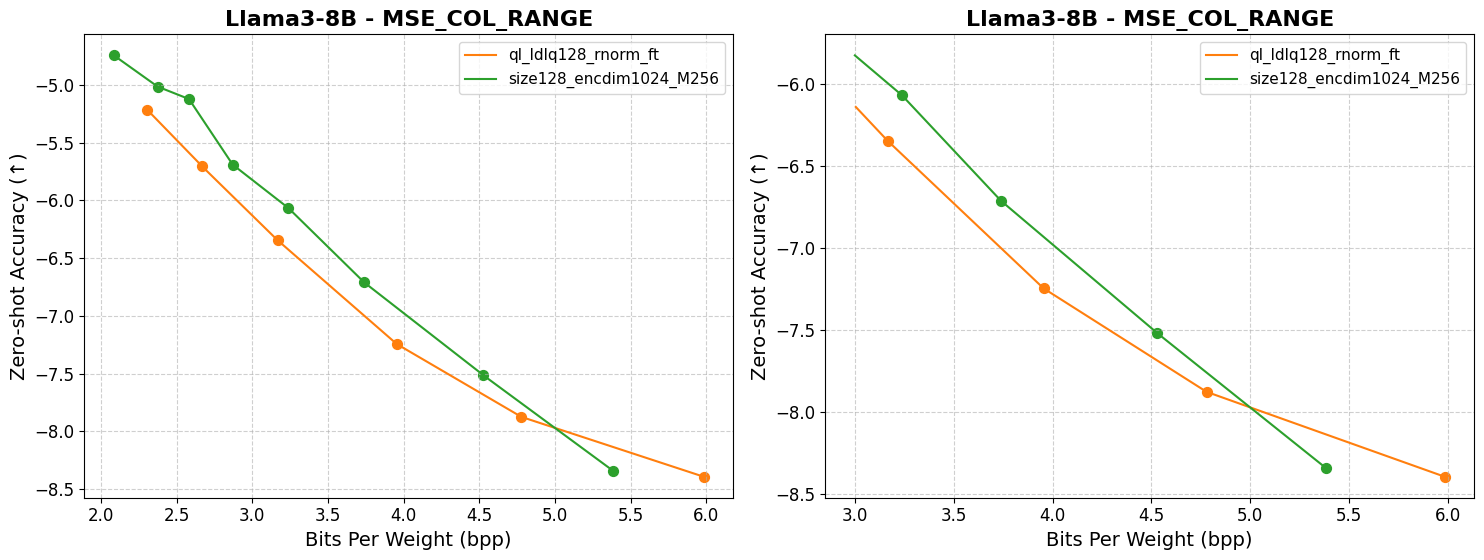

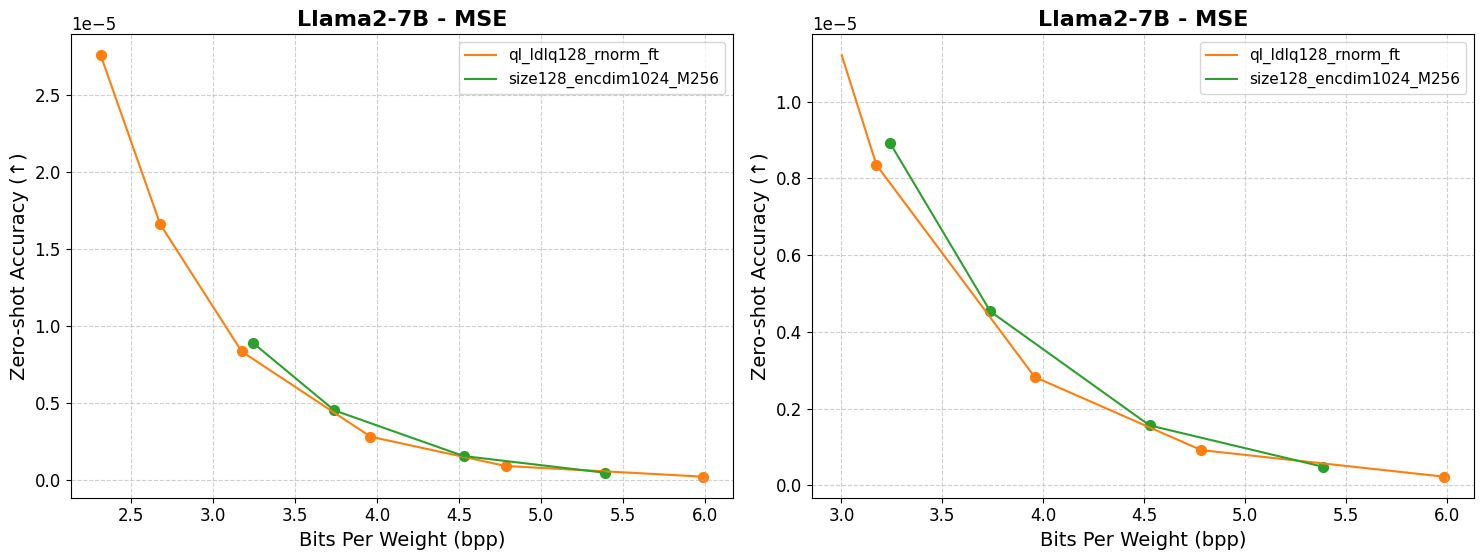

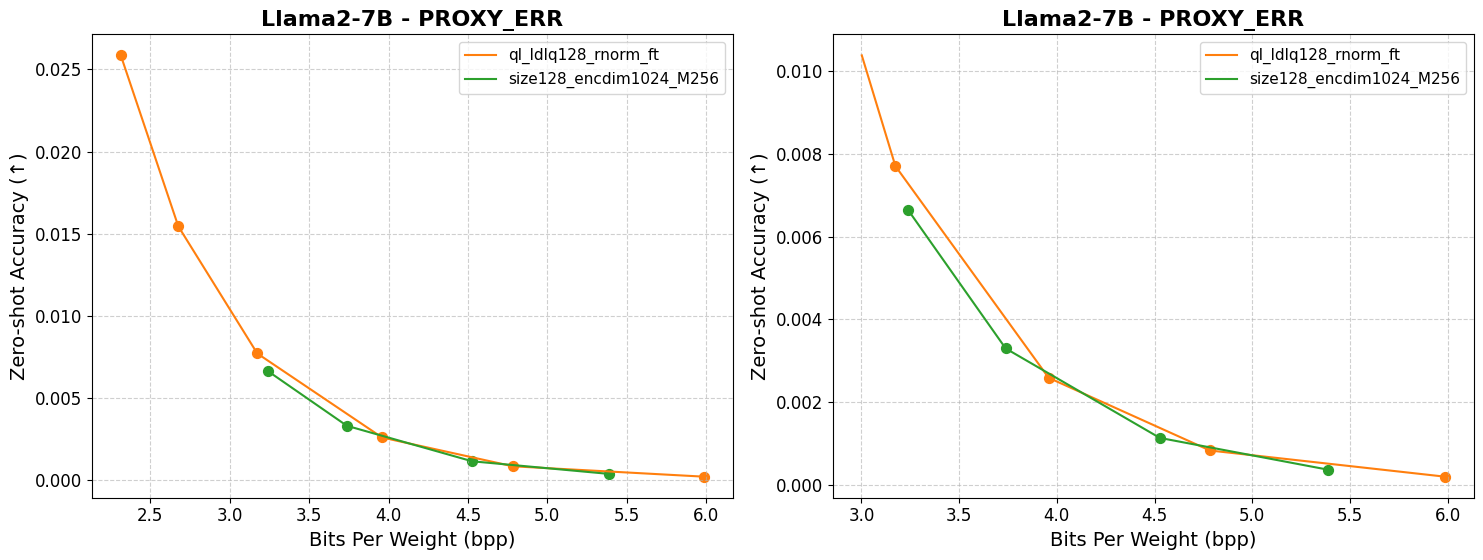

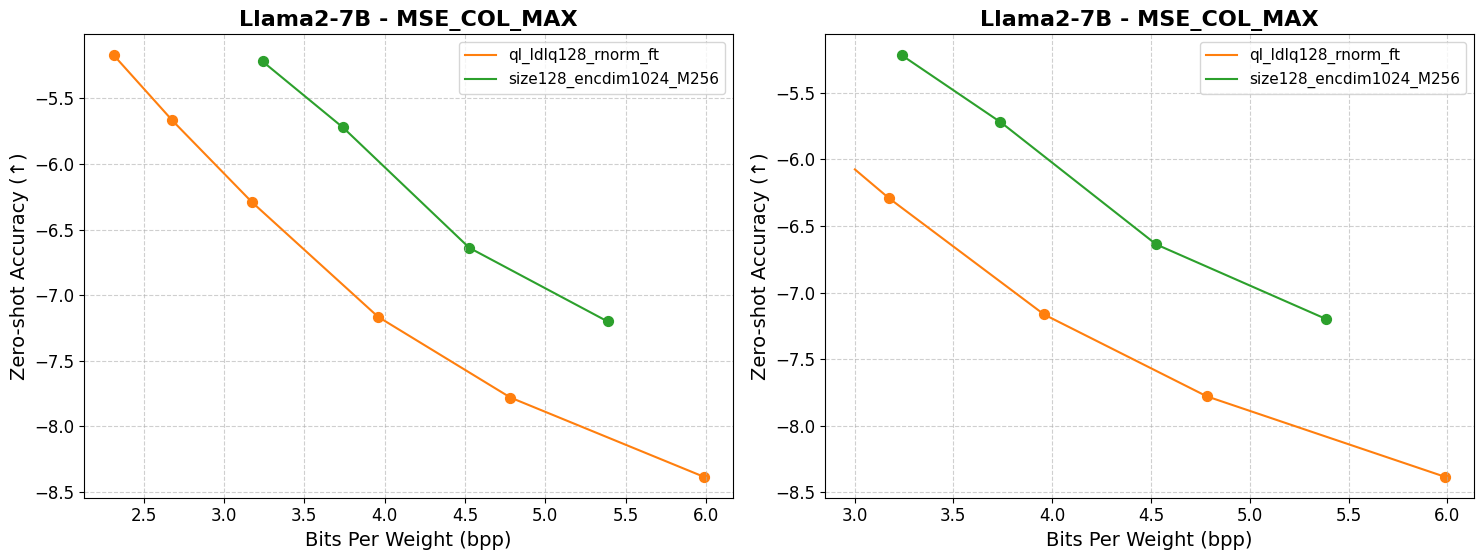

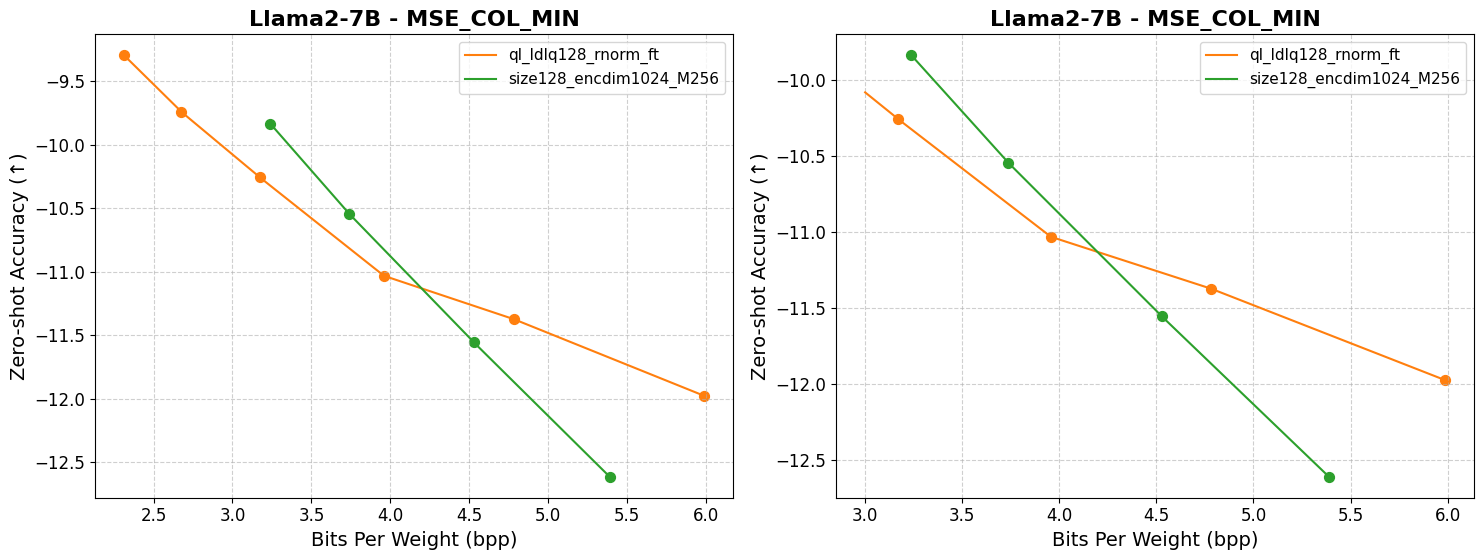

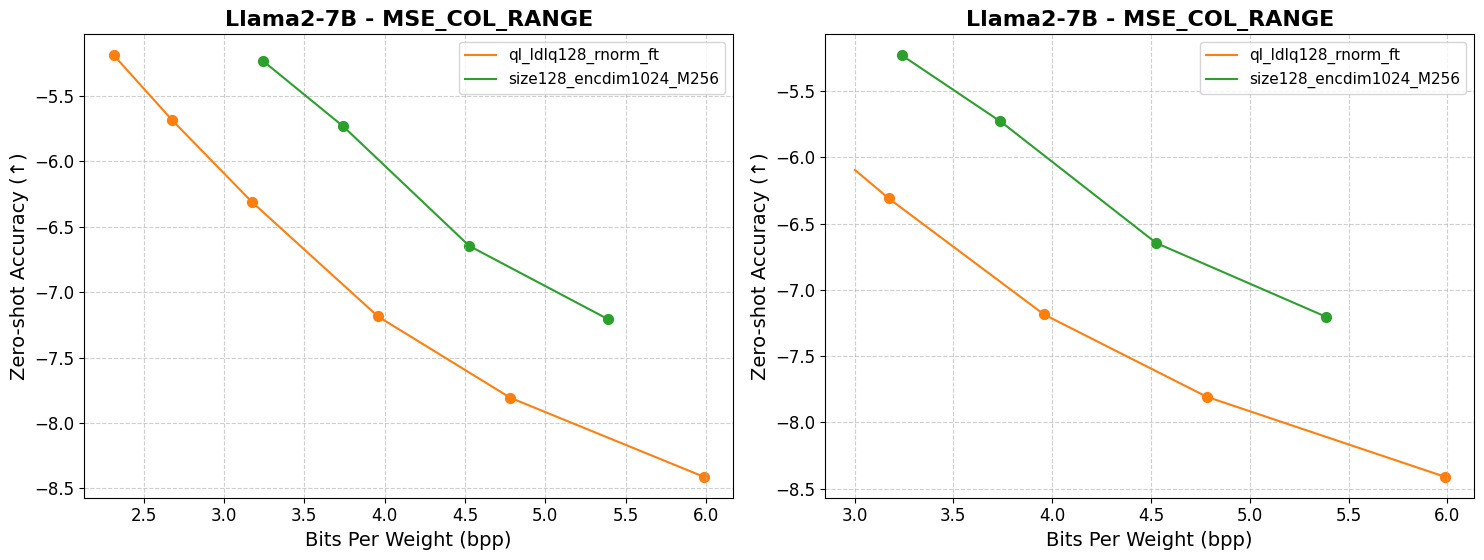

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.cm as cm
#################################################################
##                      PLOT CONFIGURATION                     ##
#################################################################
plot_name = ppl_plots['Llama3-8B'].keys()
plot_name = ppl_plots['Llama2-7B'].keys()

plot_labels = [
]

plot_keys = [
    'mse',
    'proxy_err',
    'mse_col_max',
    'mse_col_min',
    'mse_col_range',
    ]
models = [
    'Llama3-8B',
    'Llama2-7B',
    # 'Llama3.2-3B',
    # 'Llama2-13B',
    ]


# PPL_ZOOM_RANGE = (3.5, 6) ## eval
PPL_ZOOM_RANGE = (3, 8) ## eval
# ZEROSHOT_ZOOM_RANGE = (3.5, 6.0) ## eval
# PPL_ZOOM_RANGE = (2.5, 5.5)
ZEROSHOT_ZOOM_RANGE = (3, 6)
MSE_ZOOM_RANGE = (3.5, 7)
SPLINE_ORDER = 1
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 18
#################################################################
##                      HELPER FUNCTION                        ##
#################################################################
def replace_none_with_nan(data):
    """None 값을 np.nan으로 변환하여 계산에 용이하게 합니다."""
    return np.array([np.nan if val is None else val for val in data])
#################################################################
##                         MAIN SCRIPT                         ##
#################################################################
if not plot_labels or len(plot_labels) != len(plot_name):
    plot_labels = plot_name

cmap = cm.get_cmap('tab10')
# cmap = cm.get_cmap('tab20')
colors = {}
# idx = 1  # 0은 'Our' 전용
idx = 1  # 0은 'Our' 전용
for name in plot_labels:
    if 'Ours' in name:          # 필요하면 name.lower().find('our') >= 0 로
        colors[name] = cmap(0)
    else:
        colors[name] = cmap(idx)
        idx += 1

for m_name in models:
    if m_name not in ppl_plots:
        print(f"Skipping model {m_name}: No data found.")
        continue
    
    plots_data = ppl_plots[m_name]
    for plot_key in plot_keys:
        is_ppl_plot = 'ppl' in plot_key
        zoom_range = PPL_ZOOM_RANGE if is_ppl_plot else ZEROSHOT_ZOOM_RANGE
        # zoom_range = MSE_ZOOM_RANGE if plot_key == 'mse' else ZEROSHOT_ZOOM_RANGE
        
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))
        # fig, axs = plt.subplots(1, 2, figsize=(20, 7))
        
        for k, label in zip(plot_name, plot_labels):
            try:
                v = plots_data[k]
                
                bpp = replace_none_with_nan(v['bpp'])
                metric = replace_none_with_nan(v[plot_key])

                mask = np.isfinite(bpp) & np.isfinite(metric) & (metric < 50)
                # mask = np.isfinite(bpp) & np.isfinite(metric)
                # if np.count_nonzero(mask) <= SPLINE_ORDER:
                #     continue
                
                sort_indices = np.argsort(bpp[mask])
                bpp_sorted = bpp[mask][sort_indices]
                metric_sorted = metric[mask][sort_indices]
                
                x_smooth = np.linspace(bpp_sorted.min(), bpp_sorted.max(), 300)
                spline = make_interp_spline(bpp_sorted, metric_sorted, k=SPLINE_ORDER)
                y_smooth = spline(x_smooth)
                
                marker = '*' if 'Our' in label else 'o'
                marker_size = 100 if marker == '*' else 50
                lw = 2 if marker == '*' else 1.5
                # marker = 'o'
                # marker_size = 75
                # linestyle = '-.' if 'jpeg' in k or 'webp' in k else '-'
                linestyle = '-.' if 'QTIP' in k else '-'
                color = colors[label]
                
                axs[0].plot(x_smooth, y_smooth, linestyle=linestyle, color=color, label=label, alpha=1, lw=lw)
                axs[0].scatter(bpp_sorted, metric_sorted, color=color, marker=marker, s=marker_size, alpha=1)
                # axs[0].set_xscale('log')
                # if 'wiki' in plot_key:
                #     axs[0].set_xlim(1.9,8)
                # elif 'c4' in plot_key:
                #     axs[0].set_ylim(8.7,13)
                # else:
                #     axs[0].set_xlim(2,6)
                
                zoom_data_mask = (bpp_sorted >= zoom_range[0]) & (bpp_sorted <= zoom_range[1])
                zoom_smooth_mask = (x_smooth >= zoom_range[0]) & (x_smooth <= zoom_range[1])

                if np.any(zoom_data_mask):
                    axs[1].plot(x_smooth[zoom_smooth_mask], y_smooth[zoom_smooth_mask], linestyle=linestyle, color=color, label=label, alpha=1, lw=lw)
                    axs[1].scatter(bpp_sorted[zoom_data_mask], metric_sorted[zoom_data_mask], color=color, marker=marker, s=marker_size, alpha=1)
                if '8B' in m_name and 'wiki' in plot_key:
                    # axs[1].set_ylim(6, 6.8)
                    axs[0].set_ylim(6,11)
                if '8B' in m_name and 'c4' in plot_key:
                    axs[1].set_ylim(8.8, 9.4)
                    axs[0].set_ylim(8.8, 15)
                if '2-7B' in m_name and 'wiki' in plot_key:
                    axs[1].set_ylim(5.4, 5.75)
                if '2-7B' in m_name and 'c4' in plot_key:
                    axs[1].set_ylim(6.9, 7.3)
                if '2-7B' in m_name and 'commonsense' in plot_key:
                    axs[1].set_ylim(0.65, 0.67)
                if '2-7B' in m_name and 'mmlu' in plot_key:
                    axs[1].set_ylim(0.4, 0.44)
                if '13B' in m_name and 'wiki' in plot_key:
                    axs[1].set_ylim(4.8, 5.2)
                if '13B' in m_name and 'c4' in plot_key:
                    axs[1].set_ylim(6.4, 6.7)
                if '13B' in m_name and 'zeroshot' in plot_key:
                    axs[1].set_ylim(0.7, 0.72)

            except KeyError:
                print(f"Warning: Data for '{k}' not found in '{m_name}'. Skipping.")
            except Exception as e:
                print(f"An error occurred while plotting '{k}' for '{m_name}': {e}")

        y_label = 'Perplexity (↓)' if is_ppl_plot else 'Zero-shot Accuracy (↑)'
        
        for i, ax in enumerate(axs):
            try:
                fp16_val = plots_data['FP16'][plot_key]
                ax.axhline(y=fp16_val, color='r', linestyle='--', label='FP16 Baseline')
            except KeyError:
                pass
            
            ax.set_xlabel('Bits Per Weight (bpp)')
            ax.set_ylabel(y_label)
            ax.grid(True, which='both', linestyle='--', alpha=0.6)
            ax.legend()
        
        # axs[0].set_title('Full Bit-rate Range')
        axs[0].set_title(f'{m_name} - {plot_key.replace("ppl_", "").upper()}', weight='bold')
        axs[1].set_title(f'{m_name} - {plot_key.replace("ppl_", "").upper()}', weight='bold')
        # axs[1].set_title(f'Zoomed Range: {zoom_range[0]} to {zoom_range[1]} bpp')
        
        # 1. 두 번째 그래프의 범례(legend) 제거
        # axs[1].get_legend().remove()
        # 2. 두 번째 그래프의 테두리(spines) 제거
        # for spine in axs[1].spines.values():
        #     spine.set_visible(False)            
        # 3. 두 번째 그래프의 축 눈금 숫자(tick labels)도 제거하여 더 깔끔하게 만들기
        # axs[1].tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

        # fig.suptitle(f'{m_name} - {plot_key.replace("ppl_", "").upper()}', weight='bold')
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()